# 00 - Environment & Data Check

The main purpose of this notebook is to do a **sanity check** for the project setup. 
Goals:
- Verify Python environment and versions of key packages.
- Confirm raw data files exist in the expected directories. 
- Load and inspect a sample of data into DataFrame. 
- Explore and inspect dataset structure (columns, dtypes, nulls, label values).
- Create a smaller dataset with 500 rows and save them for rapid prototyping.
- Check the sample is representative of the full dataset.
- Centralize configuration (paths, random seed) to establish **reproducibility**


*Note:* This notebook is not a full data audit or data cleaning step. The goal here is to ensure the enivronment is reproducible and the  familiar with the data and the raw data is accessible and structured before deeper data analysis.

## Required Packages Imports
Import core libraries and load constants from package config.
The config centralizes path, seed valuees, and settings for reproducibility. 

In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from twitter_sentiment import data_audit
from twitter_sentiment import TRAIN_FILE, VAL_FILE, SEED, SAMPLE_FILE

## Environment & Package Versions
Print versions of Python and key libraries to ensure reproducibility.

In [3]:
print("Python:", sys.version)
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", sns.__version__)
print("Sklearn:", sklearn.__version__)

Python: 3.13.2 (tags/v3.13.2:4f8bb39, Feb  4 2025, 15:23:48) [MSC v.1942 64 bit (AMD64)]
NumPy: 2.3.2
Pandas: 2.3.2
Matplotlib: 3.10.6
Seaborn: 0.13.2
Sklearn: 1.7.1


## Dataset Availability Check
Check that the raw csv data files exist at the expected directories. 

In [4]:
for file in [TRAIN_FILE, VAL_FILE]:
    if file.exists():
         print(f"[OK] {file.name} found at {file}")
    else:
        print(f"[MISSING] {file} not found!")


[OK] twitter_training.csv found at d:\Projects\twitter_sentiment_analysis\data\raw\twitter_training.csv
[OK] twitter_validation.csv found at d:\Projects\twitter_sentiment_analysis\data\raw\twitter_validation.csv


## Sanity Check on Sample Data
Load a sample subset of the dataset to verify:
- Column headers
- Data types
- Null values
- Duplicate values
- Value distribution in columns - "sentiment_label", "entity"

In [5]:
col_names =  ["id", "entity", "sentiment_label", "tweet_content"]

train_sample_df = pd.read_csv(TRAIN_FILE, names=col_names, nrows=100)
val_sample_df = pd.read_csv(VAL_FILE, names=col_names,nrows=100)

val_sample_df.head()

,id,entity,sentiment_label,tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [6]:
train_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               100 non-null    int64 
 1   entity           100 non-null    object
 2   sentiment_label  100 non-null    object
 3   tweet_content    99 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


Smoke check: Checking for null values. Just observing here; the decision to whether drop/keep/normalize will be one in Notebook 01.

In [8]:
data_audit(train_sample_df)

Checking for duplicates...
Total duplicates: 4
**************************************************
Checking for missing values...
id                 0
entity             0
sentiment_label    0
tweet_content      1
dtype: int64
**************************************************
Checking for value counts in column "sentiment_label"...
sentiment_label
Positive    42
Neutral     36
Negative    22
Name: count, dtype: int64
**************************************************
Checking for value counts in column "entity"...
entity
Borderlands    100
Name: count, dtype: int64
**************************************************


In [9]:
data_audit(val_sample_df)

Checking for duplicates...
Total duplicates: 0
**************************************************
Checking for missing values...
id                 0
entity             0
sentiment_label    0
tweet_content      0
dtype: int64
**************************************************
Checking for value counts in column "sentiment_label"...
sentiment_label
Negative      32
Positive      31
Neutral       24
Irrelevant    13
Name: count, dtype: int64
**************************************************
Checking for value counts in column "entity"...
entity
CallOfDuty                           11
AssassinsCreed                        6
CS-GO                                 5
Microsoft                             5
TomClancysRainbowSix                  5
Overwatch                             5
Nvidia                                4
Verizon                               4
johnson&johnson                       4
PlayerUnknownsBattlegrounds(PUBG)     4
Hearthstone                           4
Facebook  

In [28]:
train_df = pd.read_csv(TRAIN_FILE, header=None, names=col_names)
val_df = pd.read_csv(VAL_FILE, header=None, names=col_names)

In [29]:
train_df["split"] = "train"

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               74682 non-null  int64 
 1   entity           74682 non-null  object
 2   sentiment_label  74682 non-null  object
 3   tweet_content    73996 non-null  object
 4   split            74682 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [31]:
train_df.head()

,id,entity,sentiment_label,tweet_content,split
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,train
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,train
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,train
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,train
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,train


In [32]:
val_df["split"] = "val"

In [33]:
val_df.head()

,id,entity,sentiment_label,tweet_content,split
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,val
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,val
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,val
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",val
4,4433,Google,Neutral,Now the President is slapping Americans in the...,val


## Sample Creation and Distribution Comparison

Combine train + validation data, then draw a random sample of 500 rows and save them in a DataFrame.
This sample data will be used for fast prototyping in later notebooks. 

Verify representativeness of the values in "sentiment_label" column by comparing the distribution in the full dataset vs the 500 row sample. 
A group bar chart to verify the distribution. 

In [16]:
combined_df = pd.concat([train_df, val_df], axis="rows")
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75682 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               75682 non-null  int64 
 1   entity           75682 non-null  object
 2   sentiment_label  75682 non-null  object
 3   tweet_content    74996 non-null  object
 4   split            75682 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.5+ MB


In [17]:
sample_500 = combined_df.sample(n=500, random_state=SEED)

In [18]:
sentiment_dist_sample = (
    (sample_500["sentiment_label"].value_counts() / sample_500.shape[0]) * 100) \
    .reset_index() \
    .rename(columns={"count": "proportion"})

sentiment_dist_sample["dataset"] = "sample"
sentiment_dist_sample

,sentiment_label,proportion,dataset
0,Negative,31.0,sample
1,Positive,26.0,sample
2,Neutral,22.6,sample
3,Irrelevant,20.4,sample


In [19]:
sentiment_dist_combined = (
    (combined_df["sentiment_label"].value_counts() / combined_df.shape[0]) * 100) \
    .reset_index() \
    .rename(columns={"count": "proportion"})

sentiment_dist_combined["dataset"] = "full"
sentiment_dist_combined

,sentiment_label,proportion,dataset
0,Negative,30.136624,full
1,Positive,27.891705,full
2,Neutral,24.580481,full
3,Irrelevant,17.391189,full


In [20]:
proportion_df = pd.concat([sentiment_dist_combined, sentiment_dist_sample], axis="index", ignore_index=True)
proportion_df

,sentiment_label,proportion,dataset
0,Negative,30.136624,full
1,Positive,27.891705,full
2,Neutral,24.580481,full
3,Irrelevant,17.391189,full
4,Negative,31.000000,sample
5,Positive,26.000000,sample
6,Neutral,22.600000,sample
7,Irrelevant,20.400000,sample


In [24]:
sns.set_palette(palette='Set2')
sns.set_style("whitegrid")

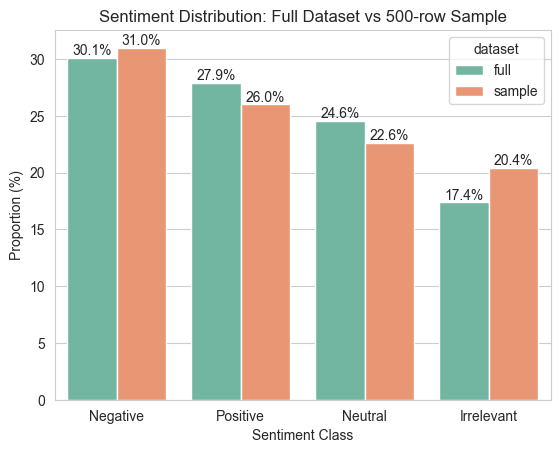

In [25]:
ax = sns.barplot(
    proportion_df,
    x="sentiment_label",
    y="proportion",
    hue="dataset",
)

for container in ax.containers:
     ax.bar_label(container, fmt="%.1f%%")

plt.title("Sentiment Distribution: Full Dataset vs 500-row Sample")
plt.xlabel("Sentiment Class")
plt.ylabel("Proportion (%)")
plt.show()

In [26]:
sample_500.to_csv(SAMPLE_FILE, index=False, encoding="UTF-8")

## Summary

- Environment created and imports verified.
- Library version verified for reproducibility.
- Configuration centralized for reproducibility.
- Confirmed raw file exists at the expected location.
- Inspected dataset structure on small sample (100 rows)
- Sample created and saved for fast prototyping for later use.
- Sample's sentiment label distribution closely matches the full dataset. 